In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from scipy.stats import pearsonr

In [2]:
# path to dataframes
path_to_dfs = "data/BLAR_implementation/Block_0303/forecasted_counts/"

In [3]:
# os.listdir(path_to_dfs)

In [4]:
len(os.listdir(path_to_dfs))

6370

In [5]:
6370/910

7.0

In [6]:
# seems each sub-window sequence have 7 things stored - what are all these?

# the forecasted npy files
# ar_sigma
# noise_sigma
# betas
# rho
# averaged forecasts
# posterior parameter summaries - might need to pay a little attention here, the r_hat values are too high - think this should vary around 1? - but almost all the values are greater than 2.

In [7]:
averaged_forecasts_csvs = []
for file in os.listdir(path_to_dfs):
    if file[:8] =='averaged':
        averaged_forecasts_csvs.append(file)

In [8]:
# how many csv files do we have?
len(averaged_forecasts_csvs)

910

In [9]:
# averaged_forecasts_csvs - we probably need these in order for getting the respective predicted values

In [10]:
averaged_forecasts_csvs[0]

'averaged_forecasts_sub_653.csv'

In [11]:
# sorting them would not work as everything in the nomenclature of the files is a character - hence will not respect the numerical order

In [12]:
# let's create these names in the order of the subwindows
ordered_csv_files = ['averaged_forecasts_sub_' + str(i) + '.csv' for i in range(910)]

In [13]:
# ordered_csv_files

In [14]:
# averaged_forecasts_csvs list is pointless at this time?

In [15]:
%%time
all_dfs = []
for file in ordered_csv_files:
    read_df = pd.read_csv(path_to_dfs + '/' + file)
    all_dfs.append(read_df)

CPU times: user 433 ms, sys: 22.6 ms, total: 456 ms
Wall time: 457 ms


In [16]:
# make a single dataframe out of the many
combined_df = pd.concat(all_dfs, axis = 1)

In [17]:
combined_df.head()

,True_value,Forecasted_value,True_value,Forecasted_value,True_value,Forecasted_value,True_value,Forecasted_value,True_value,Forecasted_value,...,True_value,Forecasted_value,True_value,Forecasted_value,True_value,Forecasted_value,True_value,Forecasted_value,True_value,Forecasted_value
0,1.676954e-07,0.058860,3.197090e-07,0.092983,0.0,-0.006539,0.0,-0.015019,0.0,-0.014308,...,0.0,-0.005259,0.000001,-0.012214,0.000004,-0.021722,0.000000,0.058780,0.00000,-0.005636
1,2.699901e-05,0.054616,3.494233e-06,0.090213,0.0,0.004936,0.0,-0.011147,0.0,-0.020334,...,0.0,-0.009821,0.000000,-0.016946,0.000000,-0.003508,0.000000,0.008588,0.00000,-0.005234
2,1.515700e-04,0.063526,3.497421e-06,0.116874,0.0,0.004189,0.0,-0.009384,0.0,-0.014389,...,0.0,0.000697,0.000000,-0.011532,0.000000,-0.012429,0.000000,0.001048,0.00000,-0.006533
3,0.000000e+00,0.045173,0.000000e+00,0.070591,0.0,-0.004705,0.0,-0.009427,0.0,-0.004497,...,0.0,0.006897,0.000000,-0.005730,0.000000,-0.007305,0.000000,0.038403,0.00000,-0.004317
4,0.000000e+00,0.025561,0.000000e+00,0.014707,0.0,-0.009816,0.0,-0.008947,0.0,-0.005424,...,0.0,0.009345,0.000000,-0.001114,0.000000,-0.008729,0.087969,0.028426,0.02528,-0.001285


In [18]:
combined_df.shape

(7, 1820)

In [19]:
# get the true values
True_values_df = combined_df[['True_value']]

In [20]:
True_values_df.head()

,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,...,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value
0,1.676954e-07,3.197090e-07,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000001,0.000004,0.000000,0.00000
1,2.699901e-05,3.494233e-06,0.0,0.0,0.0,0.000000,0.000078,0.000078,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.00000
2,1.515700e-04,3.497421e-06,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.00000
3,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000029,0.654502,0.021100,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.00000
4,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.087969,0.02528


In [21]:
True_values_df.shape

(7, 910)

In [22]:
# get the proper counts?
exp_true = np.exp(True_values_df)-1

In [23]:
exp_true

,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,...,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value
0,1.676954e-07,3.197091e-07,0.0,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.000000e+00,0.000000,0.000000e+00,0.0,0.000001,0.000004,0.000000,0.000000
1,2.699937e-05,3.494239e-06,0.0,0.000000e+00,0.000000,0.000000,0.000078,0.000078,0.0,0.0,...,0.0,0.0,0.000000e+00,0.000000,0.000000e+00,0.0,0.000000,0.000000,0.000000,0.000000
2,1.515815e-04,3.497427e-06,0.0,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.000000e+00,0.000000,0.000000e+00,0.0,0.000000,0.000000,0.000000,0.000000
3,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000,0.000029,0.924184,0.021324,0.0,0.0,...,0.0,0.0,0.000000e+00,0.000000,0.000000e+00,0.0,0.000000,0.000000,0.000000,0.000000
4,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.000000e+00,0.000000,0.000000e+00,0.0,0.000000,0.000000,0.091955,0.025602
5,0.000000e+00,0.000000e+00,0.0,3.197091e-07,0.580778,0.075164,0.000000,0.000000,0.0,0.0,...,0.0,0.0,5.677395e-07,0.000004,2.414957e-12,0.0,0.000000,0.000000,0.000000,0.000000
6,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000,0.179532,0.476410,0.000000,0.0,0.0,...,0.0,0.0,0.000000e+00,0.000000,0.000000e+00,0.0,0.000000,0.000000,0.000000,0.000000


In [24]:
# sum the true values - since the sub images are not overlapping, we can get the sum across columns in the above dataframe
sum_true_values = exp_true.sum(axis = 1)

In [25]:
sum_true_values

0    49.000171
1    46.000007
2    42.999983
3    38.999993
4    36.025885
5    36.000000
6    23.000000
dtype: float64

In [26]:
%%time
catch_all_averaged_preds = []
for i in range(910):
    file_name = "all_forecasts_sub_" + str(i) + '.npy'
    al_forecasts_npy_file = np.load(os.path.join(path_to_dfs, file_name))
    # make the conversion
    sub_window_forecasts = np.exp(al_forecasts_npy_file) - 1
    # get rid of anything below zero?
    # sub_window_forecasts[sub_window_forecasts < 0] = 0
    # get averages over time 
    sub_window_forecasts_averaged = np.mean(sub_window_forecasts, axis = (0,1))
    catch_all_averaged_preds.append(sub_window_forecasts_averaged)    

CPU times: user 161 ms, sys: 25.9 ms, total: 187 ms
Wall time: 187 ms


In [27]:
len(catch_all_averaged_preds)

910

In [28]:
catch_all_averaged_preds[0]

array([0.08518557, 0.07751976, 0.08569446, 0.0700281 , 0.05372094,
       0.07318201, 0.07218742], dtype=float32)

In [29]:
# make this a dataframe

In [30]:
Forecasted_values_df = pd.DataFrame(catch_all_averaged_preds).T

In [31]:
Forecasted_values_df.shape

(7, 910)

In [32]:
sum_forecasted_values = Forecasted_values_df.sum(axis = 1)

In [33]:
sum_forecasted_values

0    29.941465
1    32.470425
2    34.648720
3    31.294289
4    27.025034
5    35.104443
6    31.449060
dtype: float32

In [34]:
# These results are absurd, let's stick to what we had done before, we can justify that, this is what we did for comps as well

In [35]:
# concatenate the sum dataframes
block_0303_true_and_forecasted_values_df = pd.concat((sum_true_values, sum_forecasted_values), axis = 1)

In [36]:
block_0303_true_and_forecasted_values_df.columns = ["True_count", "Forecasted_count"]

In [37]:
block_0303_true_and_forecasted_values_df

,True_count,Forecasted_count
0,49.000171,29.941465
1,46.000007,32.470425
2,42.999983,34.648720
3,38.999993,31.294289
4,36.025885,27.025034
5,36.000000,35.104443
6,23.000000,31.449060


In [38]:
# blockwise mean squared error
rmse = np.sqrt(mean_squared_error(sum_true_values, sum_forecasted_values))
rmse

10.879924489026505

In [39]:
# blockwise mean absolute error
mae = mean_absolute_error(sum_true_values, sum_forecasted_values)
mae

9.570103457133447

In [40]:
corr = pearsonr(sum_true_values, sum_forecasted_values)
corr

PearsonRResult(statistic=0.051444254383428235, pvalue=0.9127810412441789)

In [41]:
r2 = r2_score(sum_true_values, sum_forecasted_values)
r2

-0.888726450672185

##### Coverages and widths for the forecasted values?

In [42]:
# for this we need the all_forecasts npy files

In [43]:
# content location is the same path as above

In [44]:
all_forecasts_npy_files = ['all_forecasts_sub_' + str(i) + '.npy' for i in range(910)]

In [45]:
# all_forecasts_npy_files

In [46]:
# load the npy files

In [47]:
%%time
loaded_npy_files = []
for file in all_forecasts_npy_files:
    joined_path = os.path.join(path_to_dfs, file)
    load_file = np.load(joined_path)
    # notice we are averaging the preds across the chains before exponentiation
    mean_file = np.mean(np.exp(load_file)-1, axis = 1)
    loaded_npy_files.append(mean_file)

CPU times: user 231 ms, sys: 62.1 ms, total: 293 ms
Wall time: 294 ms


In [48]:
len(loaded_npy_files)

910

In [49]:
loaded_npy_files[0].shape

(1000, 7)

In [50]:
loaded_npy_files[0]

array([[ 0.08120102,  0.09384966, -0.01637955, ...,  0.06980382,
         0.16505915,  0.35516945],
       [ 0.05859587,  0.05917822,  0.05737957, ...,  0.06879549,
        -0.02478433,  0.12747058],
       [-0.02898145,  0.05452091,  0.15854229, ..., -0.08874212,
         0.01013903,  0.08569917],
       ...,
       [ 0.09023242,  0.01385964,  0.20283279, ..., -0.0066134 ,
         0.15776257,  0.14593479],
       [ 0.02199152,  0.10561399, -0.01226009, ..., -0.06573872,
        -0.08567706, -0.02665149],
       [-0.02168848,  0.19820936,  0.01174596, ...,  0.08043623,
        -0.05596402,  0.04919402]], dtype=float32)

In [51]:
# %%time
# # convert less than 0 entries to 0 for all arrays
# for arr in loaded_npy_files:
#     arr[arr < 0] = 0

In [52]:
loaded_npy_files[0]

array([[ 0.08120102,  0.09384966, -0.01637955, ...,  0.06980382,
         0.16505915,  0.35516945],
       [ 0.05859587,  0.05917822,  0.05737957, ...,  0.06879549,
        -0.02478433,  0.12747058],
       [-0.02898145,  0.05452091,  0.15854229, ..., -0.08874212,
         0.01013903,  0.08569917],
       ...,
       [ 0.09023242,  0.01385964,  0.20283279, ..., -0.0066134 ,
         0.15776257,  0.14593479],
       [ 0.02199152,  0.10561399, -0.01226009, ..., -0.06573872,
        -0.08567706, -0.02665149],
       [-0.02168848,  0.19820936,  0.01174596, ...,  0.08043623,
        -0.05596402,  0.04919402]], dtype=float32)

In [53]:
# Since we do not have overlapping sub-windows, we can sum the counts to get the final densities
output = sum(loaded_npy_files)

In [54]:
output.shape

(1000, 7)

In [55]:
output

array([[41.007515, 36.78536 , 39.757927, ..., 28.331034, 29.701944,
        26.28197 ],
       [30.245424, 28.045696, 35.78489 , ..., 19.65479 , 37.418964,
        36.20275 ],
       [40.137264, 36.801395, 39.497055, ..., 29.556606, 41.22318 ,
        34.892128],
       ...,
       [31.347984, 35.41291 , 42.064777, ..., 39.94475 , 44.823414,
        48.627815],
       [35.61782 , 34.725216, 49.008705, ..., 49.764675, 49.734715,
        41.770912],
       [31.464436, 38.676666, 49.30586 , ..., 40.35826 , 48.983063,
        45.92759 ]], dtype=float32)

In [56]:
# is this sum correct? alternative method of computing the sums
output_alt = np.sum(loaded_npy_files, axis = 0)

In [57]:
output_alt.shape

(1000, 7)

In [58]:
output_alt

array([[41.007515, 36.78536 , 39.757927, ..., 28.331034, 29.701944,
        26.28197 ],
       [30.245424, 28.045696, 35.78489 , ..., 19.65479 , 37.418964,
        36.20275 ],
       [40.137264, 36.801395, 39.497055, ..., 29.556606, 41.22318 ,
        34.892128],
       ...,
       [31.347984, 35.41291 , 42.064777, ..., 39.94475 , 44.823414,
        48.627815],
       [35.61782 , 34.725216, 49.008705, ..., 49.764675, 49.734715,
        41.770912],
       [31.464436, 38.676666, 49.30586 , ..., 40.35826 , 48.983063,
        45.92759 ]], dtype=float32)

In [59]:
np.mean(output_alt == output)

1.0

In [60]:
# verified the sum is correct, let's get the widths and the coverages - and also any essential plots

In [61]:
# now we can get the 2.5th abd the 97.5th percentiles - to get the coverage and the widths of the CIS
li_train = np.percentile(output, axis = 0, q = (2.5, 97.5))[0,:].reshape(-1,1)    
ui_train = np.percentile(output, axis = 0, q = (2.5, 97.5))[1,:].reshape(-1,1)

In [62]:
li_train

array([[15.82310395],
       [19.38955708],
       [19.3904531 ],
       [14.85831876],
       [12.06892626],
       [19.89595728],
       [17.43478351]])

In [63]:
ui_train

array([[45.34790974],
       [45.41363974],
       [49.30843792],
       [46.28930655],
       [43.77660112],
       [51.92755928],
       [48.29390125]])

In [64]:
width_train = ui_train - li_train
avg_width_train = width_train.mean(0)[0]

In [65]:
avg_width_train

30.21375080857958

In [66]:
y_traina = block_0303_true_and_forecasted_values_df[["True_count"]].values

In [67]:
y_traina

array([[49.00017137],
       [46.00000671],
       [42.99998287],
       [38.99999281],
       [36.02588457],
       [36.00000019],
       [22.99999976]])

In [68]:
ind_train = (y_traina >= li_train) & (y_traina <= ui_train)
coverage_train= ind_train.mean(0)[0]

In [69]:
coverage_train

0.7142857142857143

In [70]:
np.mean(output, axis = 0)

array([29.941456, 32.47043 , 34.648727, 31.294285, 27.025045, 35.104427,
       31.449045], dtype=float32)

In [71]:
sum_forecasted_values

0    29.941465
1    32.470425
2    34.648720
3    31.294289
4    27.025034
5    35.104443
6    31.449060
dtype: float32

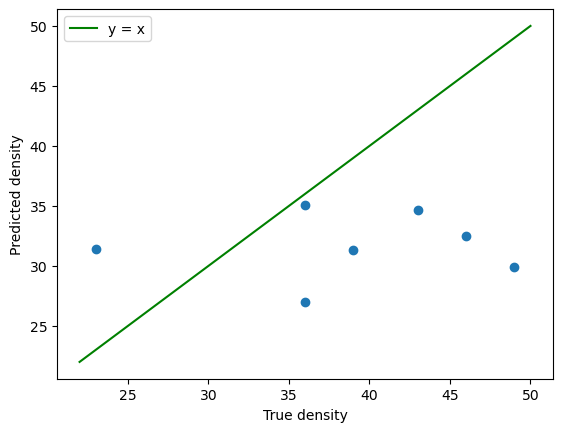

In [72]:
plt.scatter(block_0303_true_and_forecasted_values_df['True_count'], block_0303_true_and_forecasted_values_df['Forecasted_count'])
plt.xlabel("True density")
plt.ylabel("Predicted density")
# Add the y = x line
plt.plot([22, 50], [22, 50], color='green', label='y = x')
plt.legend()
plt.show()

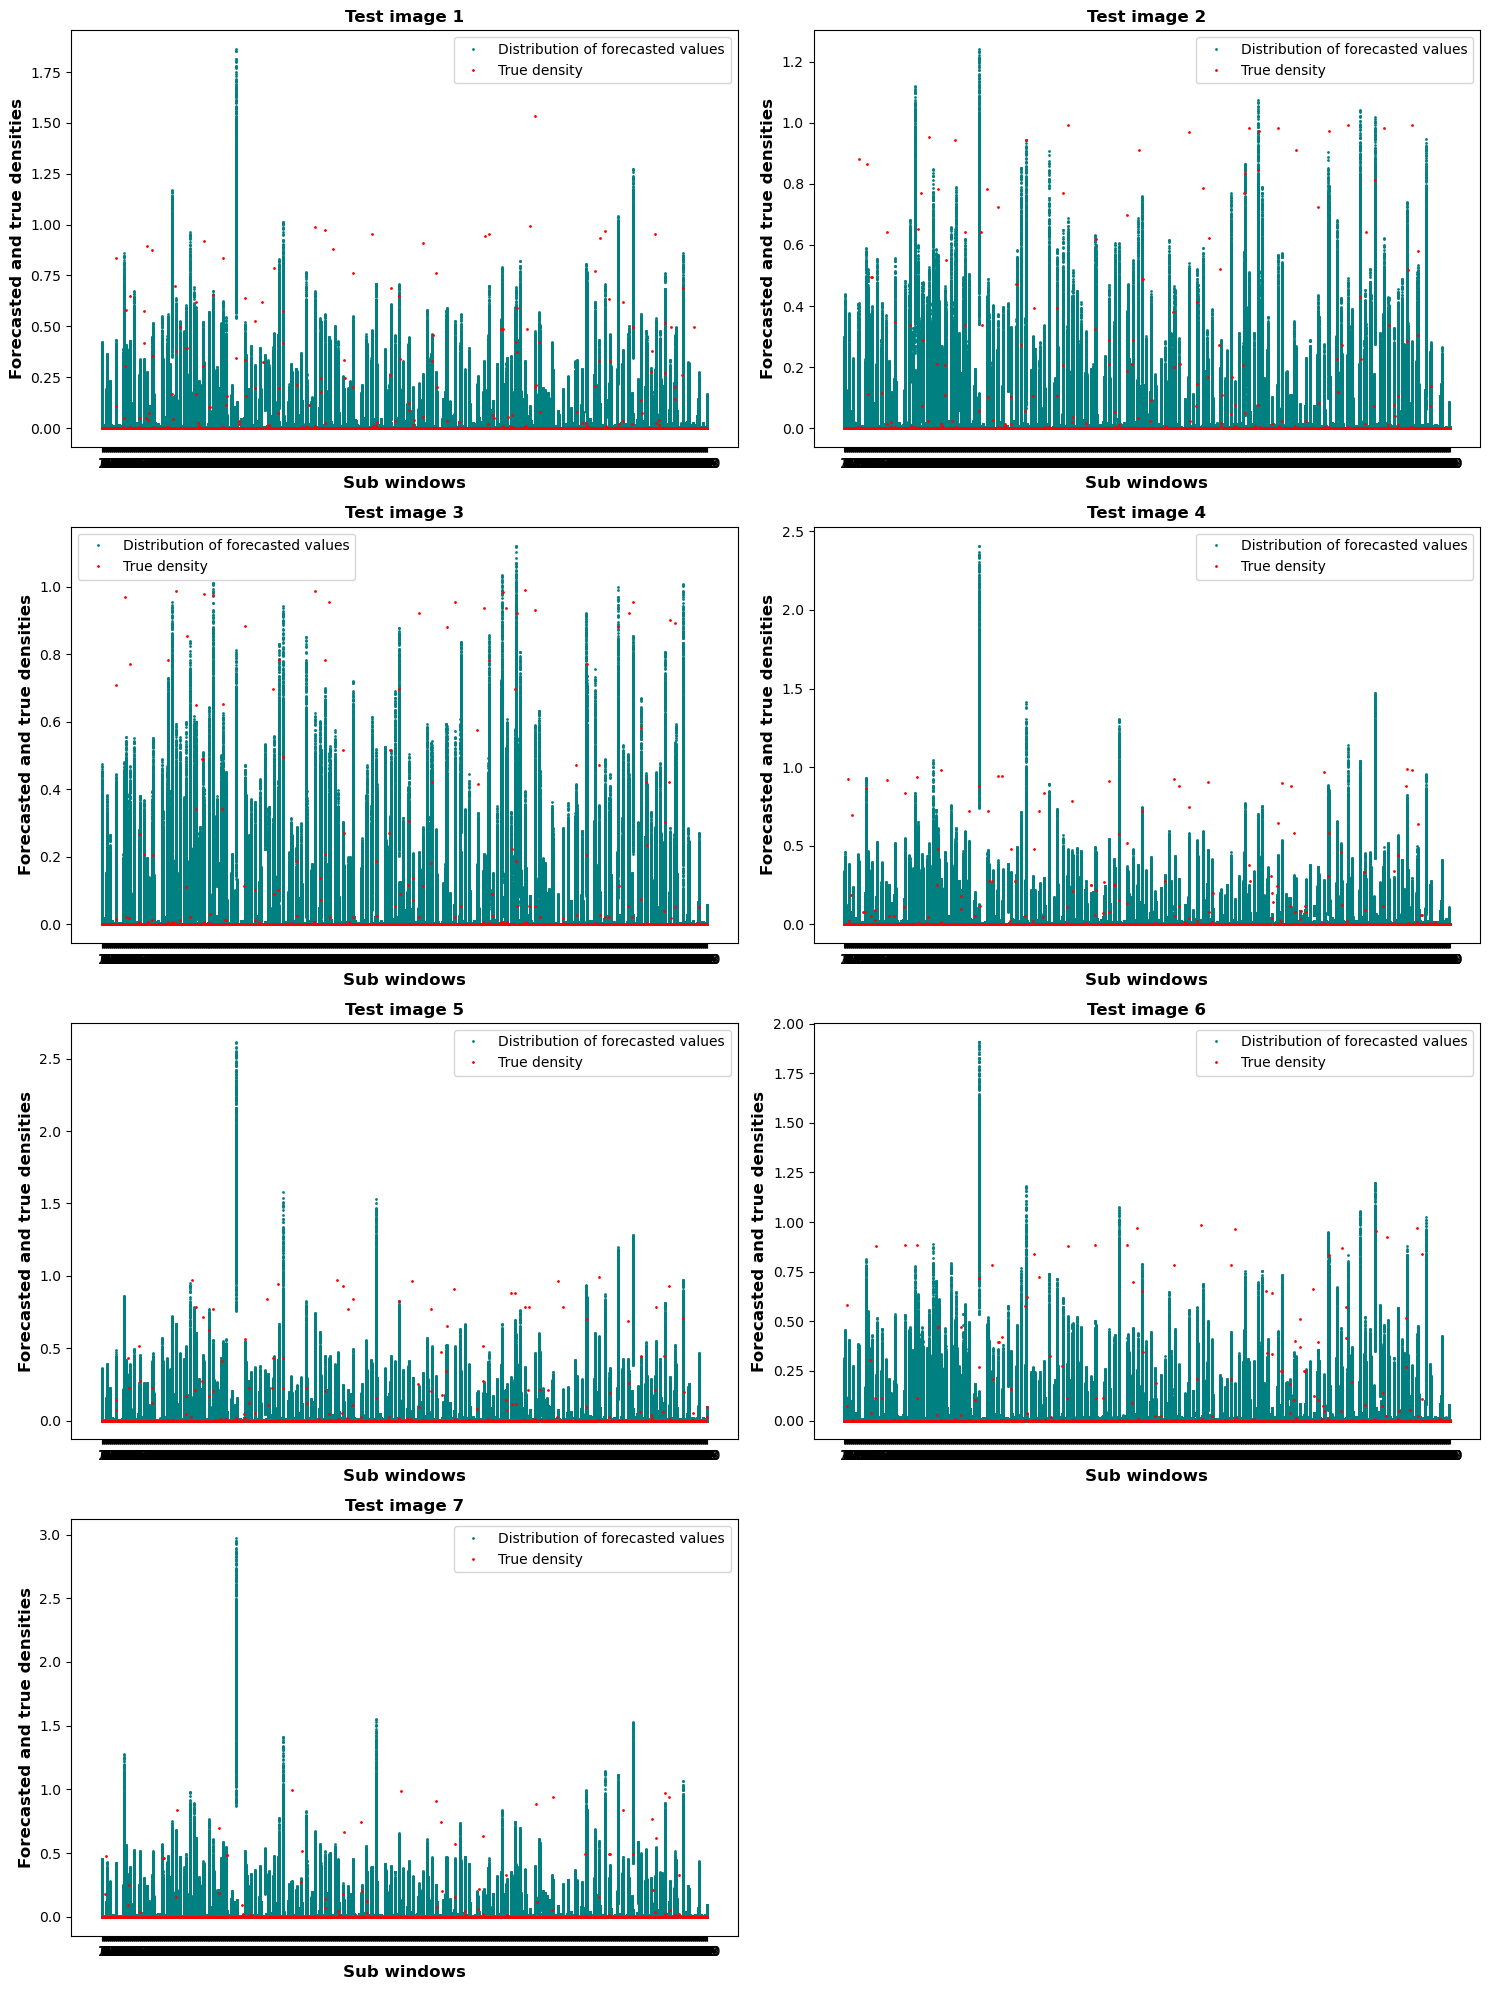

CPU times: user 25 s, sys: 864 ms, total: 25.9 s
Wall time: 25.5 s


In [73]:
%%time
# Create a 2x4 grid of subplots (total 8 plots, the last one will be left empty)
fig, axes = plt.subplots(4, 2, figsize=(15,20))
axes = axes.flatten() 

# widths plots
for i in range(7):
    timestep_i_subwindows = []
    for y, file in enumerate(loaded_npy_files):
        t_i_forecast = file[:,i]
        # print the shape of the extracted array
        # print(t_i_forecast.shape)
        timestep_i_subwindows.append(t_i_forecast)
    stacked_forecasts = np.stack(timestep_i_subwindows)
    stacked_forecasts[stacked_forecasts<0] = 0
    sorted_stacked_forecasts = np.sort(stacked_forecasts, axis = 1)
    # get the values between the 2.5th and 97.5th percentile?
    sorted_interval_data = sorted_stacked_forecasts[:,25:975]

    # Plot for the current 2D array
    for l, row in enumerate(sorted_interval_data):
        axes[i].plot([l + 1] * len(row), row, 'o', markersize=1, color='teal', label='Distribution of forecasted values' if l == 0 else "")
    
    true_counts = exp_true.iloc[i,:].values

    # # Overlay the 1D array values
    axes[i].plot(np.arange(1, 911), true_counts, 'o', markersize=1, color='red', label='True density')
    
    # Customize x-ticks and labels
    axes[i].set_xticks(np.arange(1, 911))
    # axes[i].set_xticklabels([f'sub_window_{zz + 1}' for zz in range(910)], rotation=90, fontsize=13)
    axes[i].set_xlabel("Sub windows", fontsize=12, fontweight='bold')
    axes[i].set_ylabel("Forecasted and true densities", fontsize=12, fontweight='bold')
    axes[i].set_title(f"Test image {i + 1}", fontsize=12, fontweight='bold')
    axes[i].legend()


# Hide the last (empty) subplot
axes[-1].set_visible(False)

# Adjust layout
plt.tight_layout()

# # Save the figure as a PDF file
# plt.savefig("Previous_data/Forecasted_distributions_blk13.pdf", format='pdf', bbox_inches='tight')
plt.show()



In [74]:
# plots are going to be too over-crowded as we now have 910 subwindows - might beed to talk to Dr. Ghosh to figure out a better way to give these plots

In [75]:
# we may need to re-think about the way the average forecasts were computed. Maybe get the average after exponentiating than averaging all values to a single value and then exponentiating? this would be a few lines of codes - but may be a better way to get the forecated density values? 